In [185]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gathering Data

In [132]:
# Import downloaded data 'twitter-archive-enhanced.csv' file manually
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [133]:
# Using Request library, download programmatically the dog breed image prediction files from the Udacity server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

# Import data of .tsv file as a Pandas dataframe    
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Import data from Twitter API

In [134]:
# Set up authentication details of the Twitter API 
consumer_key = 'consumer key'
consumer_secret = 'consumer secret'
access_token = 'access token'
access_secret = 'access_secret'

# Create a connection to Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [19]:
# Add each tweet to a new line of tweet_json.txt
tweet_ids = df_archive['tweet_id']
with open('tweet_json.txt', 'a', encoding='utf8') as file:
    #start_time = time.time()
    count = 0
    for tweet_id in tweet_ids:
        #start_time1 = time.time()
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
            count += 1
        except:
            continue
        #print("\nTweet ID: {} took %s seconds.".format(time.time() - start_time1))
        
    #print("\nOverall, adding {} available tweets to tweet_json.txt file took {} seconds.".format(count,(time.time() - start_time)))

In [135]:
# create dataframe by reading each line of text file
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
            

In [138]:
# store tweets_data into df_tweets_info dataframe
df_tweets_info = pd.DataFrame(tweets_data, columns = list(tweets_data[0].keys()))

df_tweets_info.head()


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8476,38487,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6238,32985,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4135,24834,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8603,41863,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9332,40023,False,False,False,False,en


In [140]:
df_tweets_info.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [141]:
# Create a dataframe with the required missing columns of twitter archive
df_tweet_missing_info = df_tweets[['id', 'retweet_count', 'favorite_count']]

df_tweet_missing_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8476,38487
1,892177421306343426,6238,32985
2,891815181378084864,4135,24834
3,891689557279858688,8603,41863
4,891327558926688256,9332,40023


# Assessing Data 

In [142]:
# View first 20 rows of df_archive daataframe
df_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [143]:
# View info of df_archive DataFrame
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [144]:
# View descriptive statistics of df_archive DataFrame
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [145]:
# View firts two rows of image_predictions dataframe
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [146]:
# View info of image_predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [147]:
# View descriptive statistics of image_predictions dataframe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [148]:
# View first 2 rows of df_tweets_info dataframe
df_tweets_info.head(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8476,38487,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6238,32985,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4135,24834,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8603,41863,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9332,40023,False,False,False,False,en
5,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,3095,20073,False,False,False,False,en
6,Fri Jul 28 16:27:12 +0000 2017,890971913173991426,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,2056,11750,False,False,False,False,en
7,Fri Jul 28 00:22:40 +0000 2017,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,18799,64982,False,False,False,False,en
8,Thu Jul 27 16:25:51 +0000 2017,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4244,27596,False,False,False,False,en
9,Wed Jul 26 15:59:51 +0000 2017,890240255349198849,890240255349198849,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,7369,31673,False,False,False,False,en


In [149]:
# View info of df_tweets_info dataframe
df_tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 27 columns):
created_at                       4752 non-null object
id                               4752 non-null int64
id_str                           4752 non-null object
full_text                        4752 non-null object
truncated                        4752 non-null bool
display_text_range               4752 non-null object
entities                         4752 non-null object
extended_entities                4189 non-null object
source                           4752 non-null object
in_reply_to_status_id            158 non-null float64
in_reply_to_status_id_str        158 non-null object
in_reply_to_user_id              158 non-null float64
in_reply_to_user_id_str          158 non-null object
in_reply_to_screen_name          158 non-null object
user                             4752 non-null object
geo                              0 non-null object
coordinates                      0 non

In [150]:
# View descriptive statistics of df_tweets_info dataframe
df_tweets_info.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count
count,4.752000e+03,1.580000e+02,1.580000e+02,4752.000000,4752.000000
mean,7.455277e+17,7.485906e+17,1.988675e+16,3060.797980,8461.491793
std,7.045588e+16,7.714714e+16,1.240975e+17,5037.935619,12791.919283
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000
25%,6.790991e+17,6.758457e+17,2.918590e+08,611.000000,1457.500000
50%,7.255941e+17,7.062329e+17,4.196984e+09,1453.000000,3613.000000
75%,8.037125e+17,8.319030e+17,4.196984e+09,3586.500000,10661.250000
max,8.924206e+17,8.862664e+17,8.405479e+17,84409.000000,163325.000000


In [151]:
# View dataframe with the desired missing columns of twitter archive

df_tweet_missing_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2411 entries, 0 to 2410
Data columns (total 3 columns):
id                2411 non-null int64
retweet_count     2411 non-null int64
favorite_count    2411 non-null int64
dtypes: int64(3)
memory usage: 56.6 KB


In [152]:
df_tweet_missing_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8476,38487
1,892177421306343426,6238,32985
2,891815181378084864,4135,24834
3,891689557279858688,8603,41863
4,891327558926688256,9332,40023


In [153]:
# View number of entries for each source
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [154]:
# display count of each dag name
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
an             7
Toby           7
Daisy          7
Buddy          7
Dave           6
Jax            6
Milo           6
Jack           6
Leo            6
Koda           6
Scout          6
Stanley        6
Rusty          6
Bella          6
Oscar          6
Gus            5
            ... 
Gòrdón         1
Biden          1
Zuzu           1
Rodman         1
Clyde          1
Brandy         1
Skye           1
Amy            1
Gin            1
Taz            1
Rufio          1
Harlso         1
Brownie        1
Grey           1
Maya           1
Anthony        1
Tess           1
Naphaniel      1
Erik           1
Holly          1
Rumble         1
Ozzie          1
Ferg           1
Zoe            1
Lambeau        1
Linus          1
Carbon         1
Mark          

In [155]:
# Sort values of 'name' column alphabetically 
# lowercase values are present at the bottom
df_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [156]:
# display counts of unique values of rating_denominator
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [157]:
# display counts of unique values of rating_numerator
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [158]:
# View rows in df_archive dataframe which contain '&amp;' instead of '&' in 'text' column
df_archive[df_archive.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https...",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester (bottom) &amp; Harold (top). They...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053...,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


In [159]:
# View rows containing the value of 'name' in lowercase which indicates that it is not an actual name
df_archive.loc[(df_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [160]:
# View rows where the value of 'name' is in lowercase and the word 'named' appears in the 'text' column which indicates that
# there is a valid dog name present in the text.
df_archive.loc[(df_archive['name'].str.islower()) & (df_archive['text'].str.contains('named') )]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713...,10,10,a,None,None,None,None


In [161]:
# View rows where the value of 'name' is in lowercase and the word 'name is' appears in the 'text' column which indicates that
# a valid dog name present in the tweet's text .
df_archive.loc[(df_archive['name'].str.islower()) & (df_archive['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None


In [162]:
# View row where dog name is 'O' while the 'text' column shows that the dog's name is actually 'O'Malley'. 
df_archive[df_archive.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [163]:
import warnings
#disable warnings
warnings.simplefilter('ignore')

In [164]:
# View rows where 'text' contains #.#/# indicating a decimal in the rating numerator, 
# while there do not appear in the 'rating_numerator' column
df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [165]:
# View row of a particular tweet that doesn't have a rating using tweet_id  
df_archive[df_archive.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


# Data Cleaning

## Summary of Data Assessment:

### Quality Issues:


1) Few variable columns such as 'in_reply_to_status_id','in_reply_to_user_id' , etc. have many missing values.

2) Dataset contains retweets. Rows and columns (such as 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') related to retweets needed to be deleted.

3) Tweets with no images

4) Incorrect dog names

5) Missing values in 'name' and 'dog_stage'showing as 'None' 

6) Contents of 'text' cutoff
 
7) Datatypes of numerator and denominator are not correct.

8) Rating numerator has only the decimals part of the overall ratings(Overall rating = 9.75, rating_numerator = 75)

9) Extra characters after '&'i.e, ‘&amp’

10) Sources difficult to read. Illegible and confusing source url is taken up.

11) Erroneous datatypes (timestamp, source, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id)

12) Dates in the format of MM/DD has been mistakenly taken as numerator and denominators of rating but these are not actually ratings.

13) Tweet ID# 810984652412424192 doesn't contain a rating

### Tidiness issues:

1) Dog stage variables presented in four columns(doggo, floofer, pupper, puppo) may be properly organized and presented in one column.

2) 3 data frames viz. df_archive_clean, df_image_predictions_clean and df_missing_tweet_info_clean can be merged and redundant columns can be dropped.

__Define:__

Create copies of original DataFrames before cleaning

__Code:__

In [166]:
# First of all create copies of original DataFrames to work with
df_archive_clean = df_archive.copy()
df_image_predictions_clean = image_predictions.copy()
df_tweet_missing_info_clean = df_tweet_missing_info.copy()

In [113]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

__Define:__

Tideness Issue 1) Creation of dog stage inplace of four different entries

__Code:__

In [167]:
# Create 'dog_stage' variable which is done by extracting the dog stage variables from the text column when available 
df_archive_clean['dog_stage'] = df_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [168]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive_clean = df_archive_clean.drop(columns, axis=1)

__Test:__

In [169]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     399 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [170]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


__Define:__

Tideness Issue 2) Join 'tweet_info' and 'image_predictions' to 'twitter_archive'

__Code:__

In [171]:
df_archive_clean = pd.merge(left = df_archive_clean, right = df_tweet_missing_info_clean, left_on='tweet_id', right_on='id', how='inner')

In [172]:
df_archive_clean = df_archive_clean.merge(df_image_predictions_clean, on='tweet_id', how='inner')

In [173]:
df_archive_clean = df_archive_clean.drop('id', axis=1)


__Test:__

In [174]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 0 to 2122
Data columns (total 27 columns):
tweet_id                      2123 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2123 non-null object
source                        2123 non-null object
text                          2123 non-null object
retweeted_status_id           76 non-null float64
retweeted_status_user_id      76 non-null float64
retweeted_status_timestamp    76 non-null object
expanded_urls                 2123 non-null object
rating_numerator              2123 non-null int64
rating_denominator            2123 non-null int64
name                          2123 non-null object
dog_stage                     351 non-null object
retweet_count                 2123 non-null int64
favorite_count                2123 non-null int64
jpg_url                       2123 non-null object
img_num                       2123 non

__Define:__
    
Quality Issue 1) Columns with many null values needed to be dropped

__Code:__

In [175]:
# drop columns 'in_reply_to_status_id','in_reply_to_user_id' which have many missing values.
columns = ['in_reply_to_status_id','in_reply_to_user_id']
df_archive_clean = df_archive_clean.drop(columns, axis=1)

__Test:__

In [176]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 0 to 2122
Data columns (total 25 columns):
tweet_id                      2123 non-null int64
timestamp                     2123 non-null object
source                        2123 non-null object
text                          2123 non-null object
retweeted_status_id           76 non-null float64
retweeted_status_user_id      76 non-null float64
retweeted_status_timestamp    76 non-null object
expanded_urls                 2123 non-null object
rating_numerator              2123 non-null int64
rating_denominator            2123 non-null int64
name                          2123 non-null object
dog_stage                     351 non-null object
retweet_count                 2123 non-null int64
favorite_count                2123 non-null int64
jpg_url                       2123 non-null object
img_num                       2123 non-null int64
p1                            2123 non-null object
p1_conf                       2123 no

In [177]:
df_archive_clean.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
1,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


__Define:__
    
Quality Issue 2) Remove retweets. Rows related to retweet(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) has to be deleted

__Code:__

In [178]:
# Select rows where 'retweeted_status_id' is null to save to twitter_archive_clean
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

__Test:__

In [179]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2122
Data columns (total 25 columns):
tweet_id                      2047 non-null int64
timestamp                     2047 non-null object
source                        2047 non-null object
text                          2047 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2047 non-null object
rating_numerator              2047 non-null int64
rating_denominator            2047 non-null int64
name                          2047 non-null object
dog_stage                     339 non-null object
retweet_count                 2047 non-null int64
favorite_count                2047 non-null int64
jpg_url                       2047 non-null object
img_num                       2047 non-null int64
p1                            2047 non-null object
p1_conf                       2047 non-n

__Define:__

    Quality Issue 2) Columns related to retweet being deleted

__Code:__

In [180]:
# drop columns related to retweets 
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archive_clean = df_archive_clean.drop(columns, axis=1)

__Test:__

In [181]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2122
Data columns (total 22 columns):
tweet_id              2047 non-null int64
timestamp             2047 non-null object
source                2047 non-null object
text                  2047 non-null object
expanded_urls         2047 non-null object
rating_numerator      2047 non-null int64
rating_denominator    2047 non-null int64
name                  2047 non-null object
dog_stage             339 non-null object
retweet_count         2047 non-null int64
favorite_count        2047 non-null int64
jpg_url               2047 non-null object
img_num               2047 non-null int64
p1                    2047 non-null object
p1_conf               2047 non-null float64
p1_dog                2047 non-null bool
p2                    2047 non-null object
p2_conf               2047 non-null float64
p2_dog                2047 non-null bool
p3                    2047 non-null object
p3_conf               2047 non-null float6

__Define:__
    
Quality Issue 3) Remove rows where there are no images (expanded_urls).

__Code:__

In [183]:
df_archive_clean = df_archive_clean.dropna(subset=['expanded_urls'])

__Test:__

In [184]:
sum(df_archive_clean['expanded_urls'].isnull())

0

__Define:__
    
    Quality Issue 4) Change incorrect dog names.

__Code:__

In [188]:
# Save locations where 'name' column is lowercase; where 'text' column contains 'named' in lowercase, and 'name is' in lowercase
# column contains the words 'name is'
replace_named = df_archive_clean.loc[(df_archive_clean['name'].str.islower()) & (df_archive_clean['text'].str.contains('named'))]
replace_name_is = df_archive_clean.loc[(df_archive_clean['name'].str.islower()) & (df_archive_clean['text'].str.contains('name is'))]
replace_not_named = df_archive_clean.loc[(df_archive_clean['name'].str.islower())]

# Save these locations as lists
replace_named_list = replace_named['text'].tolist()
replace_name_is_list = replace_name_is['text'].tolist()
replace_not_named_list = replace_not_named['text'].tolist()

# For loop to iterate through locations where name is lowercase and the words 'named' appear in 'text' and set the 'name' 
# value to be the word that appears after 'named'
for entry in replace_named_list:
    mask = df_archive_clean.text == entry
    name_column = 'name'
    df_archive_clean.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

# For loop to iterate through locations where name is lowercase and the words 'name is' appear in 'text' and set the 'name' 
# value to be the word that appears after 'name is'  
for entry in replace_name_is_list:
    mask = df_archive_clean.text == entry
    name_column = 'name'
    df_archive_clean.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)    

# For loop to iterate through locations where name is lowercase and replace the name value with the word "None"
for entry in replace_not_named_list:
    mask = df_archive_clean.text == entry
    name_column = 'name'
    df_archive_clean.loc[mask, name_column] = "None"

In [190]:
# Rectify the spelling mistake in name(Replace occurence of "O" with "O'Malley")
df_archive_clean.name = df_archive_clean.name.replace("O", "O'Malley")

__Test:__

In [193]:
df_archive_clean.name.sort_values()

913             Abby
924             Abby
845              Ace
1733            Acro
1186           Adele
1734           Aiden
131              Aja
132              Aja
462            Akumi
741               Al
789           Albert
1753          Albert
202            Albus
407            Albus
996          Aldrick
1844       Alejandro
377        Alexander
1068    Alexanderson
467              Alf
773            Alfie
370            Alfie
2006           Alfie
1441           Alfie
93              Alfy
92              Alfy
1518           Alice
242            Alice
1336           Amber
1193         Ambrose
1876             Amy
            ...     
738          Winston
305          Winston
403          Winston
885          Winston
1931         Winston
531          Winston
1113         Winston
1635         Winston
791           Wishes
1298           Wyatt
226            Wyatt
405            Wyatt
1232            Yoda
575             Yogi
77              Yogi
76              Yogi
1191         

In [198]:
display(df_archive_clean.loc[(df_archive_clean['name'].str.islower())])

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [199]:
df_archive_clean[df_archive_clean.name == "O'Malley"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
702,776201521193218049,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O'Malley,NaN,2795,...,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


__Define:__
    
    Quality Issue 5) Missing values in 'name' and 'dog_stage'showing as 'None'. Change them to NaN.

__Code:__

In [201]:
# Missing values in 'name' changed from ‘none’ to ‘NaN’
df_archive_clean['name'] = df_archive_clean['name'].replace('None', np.NaN)

__Test:__

In [203]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047 entries, 0 to 2122
Data columns (total 22 columns):
tweet_id              2047 non-null int64
timestamp             2047 non-null object
source                2047 non-null object
text                  2047 non-null object
expanded_urls         2047 non-null object
rating_numerator      2047 non-null int64
rating_denominator    2047 non-null int64
name                  1396 non-null object
dog_stage             339 non-null object
retweet_count         2047 non-null int64
favorite_count        2047 non-null int64
jpg_url               2047 non-null object
img_num               2047 non-null int64
p1                    2047 non-null object
p1_conf               2047 non-null float64
p1_dog                2047 non-null bool
p2                    2047 non-null object
p2_conf               2047 non-null float64
p2_dog                2047 non-null bool
p3                    2047 non-null object
p3_conf               2047 non-null float6

__Define:__

    Quality issue: 6) Define full contents of 'text' column which are cutoff.

__Code:__

In [205]:
# Set column width to infinite so entire content of 'text' column is displayed
pd.set_option('display.max_colwidth', -1)

__Test:__

In [206]:
df_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1839,671542985629241344,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is JD (stands for ""just dog""). He's like Airbud but with trading card games instead of sports. 10/10 much skill https://t.co/zzueJV9jCF",https://twitter.com/dog_rates/status/671542985629241344/photo/1,10,10,JD,NaN,594,...,1,Shetland_sheepdog,0.980339,True,collie,0.006693,True,papillon,0.006157,True
862,751132876104687617,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He's just so damn happy. 10/10 what's your secret puppo? https://t.co/yToDwVXEpA,"https://twitter.com/dog_rates/status/751132876104687617/photo/1,https://twitter.com/dog_rates/status/751132876104687617/photo/1",10,10,Cooper,puppo,1430,...,1,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True
457,816336735214911488,2017-01-03 17:33:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dudley. He found a flower and now he's a queen. 11/10 would be an honor to pet https://t.co/nuJxtmlLcY,https://twitter.com/dog_rates/status/816336735214911488/photo/1,11,10,Dudley,NaN,2170,...,1,Labrador_retriever,0.919330,True,kuvasz,0.049480,True,golden_retriever,0.011934,True
534,802572683846291456,2016-11-26 18:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Winnie. She's h*ckin ferocious. Dandelion doesn't even see her coming. 12/10 would pet with caution https://t.co/EFfLCP7oQv,https://twitter.com/dog_rates/status/802572683846291456/photo/1,12,10,Winnie,NaN,2802,...,1,golden_retriever,0.610171,True,Labrador_retriever,0.173252,True,cocker_spaniel,0.163257,True
1253,699691744225525762,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62",https://twitter.com/dog_rates/status/699691744225525762/photo/1,5,10,Dave,NaN,4979,...,1,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False


### Define:

   
   Quality Issue 7)  Datatypes of numerator and denominator needed to be rectified..


### Code:

In [290]:
# Change datatype of rating_numerator and denominator to float
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype('float')
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype('float')

### Test:

In [286]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2122
Data columns (total 22 columns):
tweet_id              2046 non-null object
timestamp             2046 non-null datetime64[ns]
source                2046 non-null category
text                  2046 non-null object
expanded_urls         2046 non-null object
rating_numerator      2046 non-null float64
rating_denominator    2046 non-null float64
name                  1395 non-null object
dog_stage             339 non-null category
retweet_count         2046 non-null int64
favorite_count        2046 non-null int64
jpg_url               2046 non-null object
img_num               2046 non-null int64
p1                    2046 non-null object
p1_conf               2046 non-null float64
p1_dog                2046 non-null bool
p2                    2046 non-null object
p2_conf               2046 non-null float64
p2_dog                2046 non-null bool
p3                    2046 non-null object
p3_conf               204

__Define:__

    Quality issue: 8) Fix rating_numerator that contains only decimals part extracted from the overall rating.

__Code:__


In [213]:
# View tweets with decimals in rating in 'text' column
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
80,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,NaN,9916,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
81,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,NaN,9918,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
636,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,6789,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
692,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,NaN,1804,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1528,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,pupper,524,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [214]:
# Change datatype of rating_numerator and denominator to float
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype('float')
df_archive_clean['rating_denominator'] = df_archive_clean['rating_denominator'].astype('float')

In [215]:
# Set correct numerators for specific tweets
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 786709082849828864) & (df_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 680494726643068929) & (df_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

__Test:__

In [216]:
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
80,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.00,10.0,Bella,NaN,9916,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
81,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.00,10.0,Bella,NaN,9918,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
636,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,NaN,6789,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
692,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.00,10.0,Sophie,NaN,1804,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1528,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10.0,NaN,pupper,524,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


__Define:__
    
Quality Issue 9) Remove extra characters after '&' in df_archive_clean['text'].

__Code:__

In [221]:
df_archive_clean['text'] = df_archive_clean['text'].str.replace('&amp;', '&')

__Test:__

In [222]:
df_archive_clean[df_archive_clean.text.str.contains('&amp;')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


__Define:__
    
    Quality issue 10) Illegible and confusing source url is taken up. Change sources to more readable categories.

__Code:__

In [223]:
# remove url from sources
df_archive_clean['source'] = df_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_archive_clean['source'] = df_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
df_archive_clean['source'] = df_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_archive_clean['source'] = df_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [225]:
# change datatype to category
df_archive_clean['source'] = df_archive_clean['source'].astype('category')

__Test:__

In [227]:
df_archive_clean.source.value_counts()

Twitter for iPhone    2007
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

In [229]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2122
Data columns (total 22 columns):
tweet_id              2046 non-null int64
timestamp             2046 non-null object
source                2046 non-null category
text                  2046 non-null object
expanded_urls         2046 non-null object
rating_numerator      2046 non-null float64
rating_denominator    2046 non-null float64
name                  1395 non-null object
dog_stage             339 non-null object
retweet_count         2046 non-null int64
favorite_count        2046 non-null int64
jpg_url               2046 non-null object
img_num               2046 non-null int64
p1                    2046 non-null object
p1_conf               2046 non-null float64
p1_dog                2046 non-null bool
p2                    2046 non-null object
p2_conf               2046 non-null float64
p2_dog                2046 non-null bool
p3                    2046 non-null object
p3_conf               2046 non-null 

__Define:__
    
    Quality issue 11) Change datatypes of timestamp to datetime, dog_stage to categorical, and tweet_id to strings.

__Code:__

In [231]:
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].astype('category')
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype('str')

__Test:__

In [233]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2122
Data columns (total 22 columns):
tweet_id              2046 non-null object
timestamp             2046 non-null datetime64[ns]
source                2046 non-null category
text                  2046 non-null object
expanded_urls         2046 non-null object
rating_numerator      2046 non-null float64
rating_denominator    2046 non-null float64
name                  1395 non-null object
dog_stage             339 non-null category
retweet_count         2046 non-null int64
favorite_count        2046 non-null int64
jpg_url               2046 non-null object
img_num               2046 non-null int64
p1                    2046 non-null object
p1_conf               2046 non-null float64
p1_dog                2046 non-null bool
p2                    2046 non-null object
p2_conf               2046 non-null float64
p2_dog                2046 non-null bool
p3                    2046 non-null object
p3_conf               204

__Define:__

Quality issue 12: Fix rating numerator and denominators that are not actually ratings.

__Code:__

In [235]:
# View all occurences where there are more than one #/# in 'text' column
df_archive_clean[df_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
694,777684233540206592,2016-09-19 01:42:24,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12.0,10.0,NaN,NaN,3269,...,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
902,747600769478692864,2016-06-28 01:21:27,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10.0,10.0,Bookstore,NaN,598,...,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
953,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14.0,10.0,NaN,NaN,14459,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1044,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13.0,10.0,NaN,NaN,1701,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
1078,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.0,10.0,Bluebert,NaN,232,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1094,714258258790387713,2016-03-28 01:10:13,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 & 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10.0,10.0,Travis,NaN,775,...,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1216,703356393781329922,2016-02-26 23:10:06,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9.0,10.0,Socks,NaN,420,...,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1306,695064344191721472,2016-02-04 02:00:27,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,4.0,10.0,NaN,NaN,652,...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1311,694352839993344000,2016-02-02 02:53:12,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random & can't bark for shit. 10/10 & 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",10.0,10.0,Oliviér,NaN,672,...,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
1346,691483041324204033,2016-01-25 04:49:38,Twitter for iP

In [ ]:
# Save the text where the rating numerator and denominators were incorrectly extracted
ratings_to_fix = ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', 
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [236]:
# Loop through the list of ratings to fix. Extract the second occurence of #/ to save as the rating numerator. 
#As all the occurences of the actual ratings in the ratings to fix list have a denominator of 10, we will set that value for each 
#entry instead of extracting it.
for entry in ratings_to_fix:
    mask = df_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    df_archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_archive_clean.loc[mask, column_name2] = 10

### Test:

In [291]:
df_archive_clean[df_archive_clean.text.isin(ratings_to_fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
953,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14.0,10.0,NaN,NaN,14459,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1044,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13.0,10.0,NaN,NaN,1701,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
1078,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.0,10.0,Bluebert,NaN,232,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1482,682962037429899265,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10.0,10.0,Darrel,NaN,18191,...,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
2102,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9.0,10.0,NaN,NaN,64,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


__Define:__

    Quality Issue 13) Tweet ID# 810984652412424192 doesn't contain a rating. Remove tweet without rating.

__Code:__

In [218]:
df_archive_clean = df_archive_clean[df_archive_clean.tweet_id != 810984652412424192] 

__Test__

In [219]:

df_archive_clean[df_archive_clean.tweet_id == 810984652412424192]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# Store

In [238]:
# Save clean DataFrame to csv file
df_archive_clean.to_csv('twitter_archive_master.csv')

## Analyse

In [257]:
# Create copy of twitter_archive_clean to work using only my variables of interest
df_analyze = df_archive_clean[['timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()

In [277]:
df_analyze.head()

,retweet_count,favorite_count,rating_numerator,rating_denominator
timestamp,,,,
2017-08-01 16:23:56,8476,38487,13,10.0
2017-08-01 16:23:56,8471,38486,13,10.0
2017-08-01 00:17:27,6238,32985,13,10.0
2017-08-01 00:17:27,6238,32963,13,10.0
2017-07-31 00:18:03,4135,24834,12,10.0


In [278]:
df_analyze.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2046 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 4 columns):
retweet_count         2046 non-null int64
favorite_count        2046 non-null int64
rating_numerator      2046 non-null object
rating_denominator    2046 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 159.9+ KB


In [258]:
# Set the index to be the timestamp so time is displayed properly in plots
df_analyze.set_index('timestamp', inplace = True)

## Retweets, Favorites and Ratings Correlation

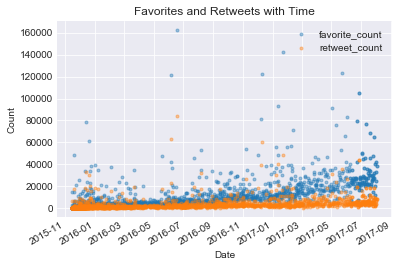

In [260]:
df_analyze[['favorite_count', 'retweet_count']].plot(style = '.', alpha = 0.4)
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

In [293]:
# Change datatype of rating_numerator and denominator to similar datatype(float) so that rating_ratio can be calculated
df_analyze['rating_numerator'] = df_analyze['rating_numerator'].astype('float')
df_analyze['rating_denominator'] = df_analyze['rating_denominator'].astype('float')

In [296]:
# Create rating_ratio variable by dividing the rating numerator by the deonominator to normalize scores which are not out of 10
df_analyze['rating_ratio'] = np.divide(df_analyze['rating_numerator'], df_analyze['rating_denominator'])

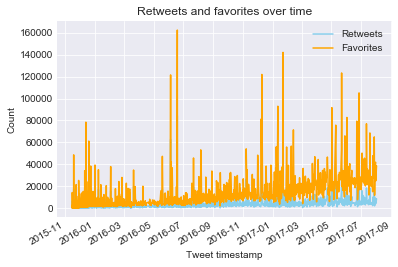

In [299]:
df_analyze['retweet_count'].plot(color = 'skyblue', label='Retweets')
df_analyze['favorite_count'].plot(color = 'orange', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper right')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

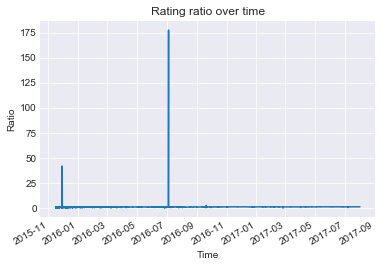

In [300]:
df_analyze['rating_ratio'].plot()
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio.png')
plt.show()

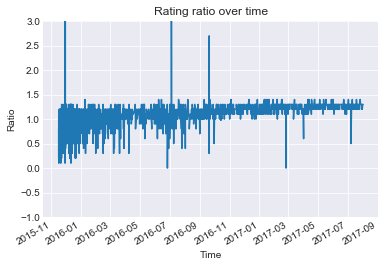

In [301]:
# Limit y axis to zoom in on data and ignore outliers
df_analyze['rating_ratio'].plot()
plt.ylim(-1, 3)
plt.style.use('seaborn-darkgrid')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.title('Rating ratio over time')
plt.savefig('ratio_zoom.png')
plt.show()

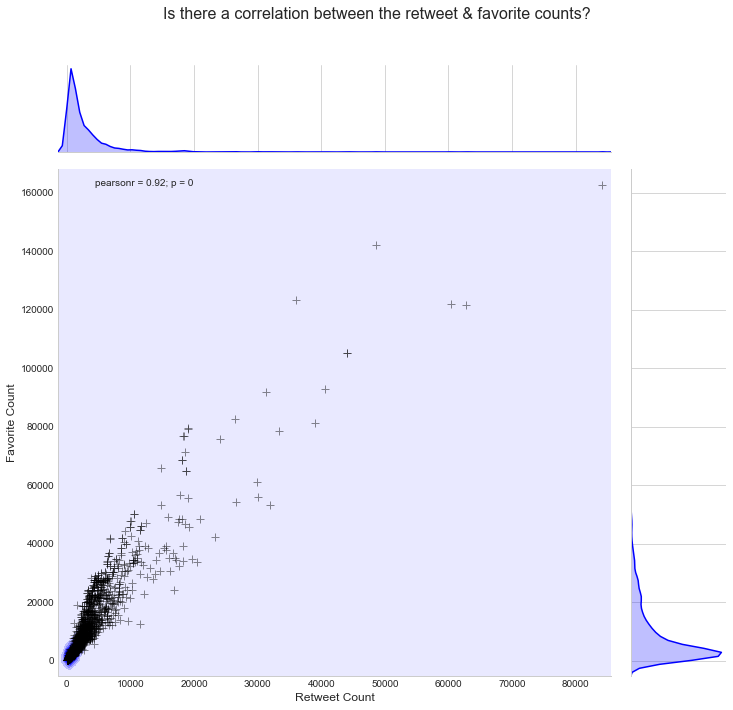

In [283]:
#Visualization comparing the favorite & retweet counts
sns.set_style('whitegrid')
g = sns.jointplot(x="retweet_count", 
                  y="favorite_count", 
                  data=df_analyze, 
                  color="blue",
                  kind="kde", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="black",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.45)
g.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)

g.fig.subplots_adjust(top=0.9)
plt.suptitle('Is there a correlation between the retweet & favorite counts?',
                 fontsize=16);